# Unsupervised Learning Project1

## Introduction

###PART A

**DOMAIN**: Automobile

**CONTEXT**: The data concerns city-cycle fuel consumption in miles per gallon to be predicted in terms of 3 multivalued discrete and 5 continuous attributes

**DATA DESCRIPTION**:

 - cylinders: multi-valued discrete

 - acceleration: continuous

 - displacement: continuous

 - model year: multi-valued discrete

 - horsepower: continuous

 - origin: multi-valued discrete

 - weight: continuous

 - car name: string (unique for each instance)

 - mpg: continuous

Import necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

%matplotlib inline

## Load the dataset

In [2]:
car_df = pd.read_csv("Car name.csv")

In [3]:
car_df.head()

,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino


Read ‘Car-Attributes.json as a DataFrame and assign it to a variable

In [4]:
caratt_df = pd.read_json('Car-Attributes.json')

In [5]:
caratt_df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [6]:
caratt_df.shape

(398, 8)

Merge both the DataFrames together to form a single DataFrame

In [7]:
data_df = pd.concat([car_df, caratt_df], axis=1)
data_df.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [8]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


Print 5 point summary of the numerical features and share insights

In [9]:
data_df.describe()

,mpg,cyl,disp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


## Data Preparation & Analysis

Check and print feature-wise percentage of missing values present in the data and impute with the best suitable approach.

In [10]:
data_df.isnull().sum()

car_name    0
mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
dtype: int64

In [11]:
data_df.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1


Check for unexpected values in all the features and datapoints

In [12]:
temp = pd.DataFrame(data_df.hp.str.isdigit())
temp[temp['hp'] == False]

,hp
32,False
126,False
330,False
336,False
354,False
374,False


There are six non numeric values for hp which have the value as '?'

In [13]:
data_df = data_df.replace('?', np.nan)

Replace the missing values with median

In [14]:
data_df['hp'] = data_df['hp'].fillna(data_df['hp'].median())

# converting the hp column from object / string type to float
data_df['hp'] = data_df['hp'].astype('float64')

In [15]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    float64
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


Check for duplicate values in the data and impute with the best suitable approach

In [16]:
data_df.duplicated().sum()

0

There is no duplicate value

Plot a pairplot for all features

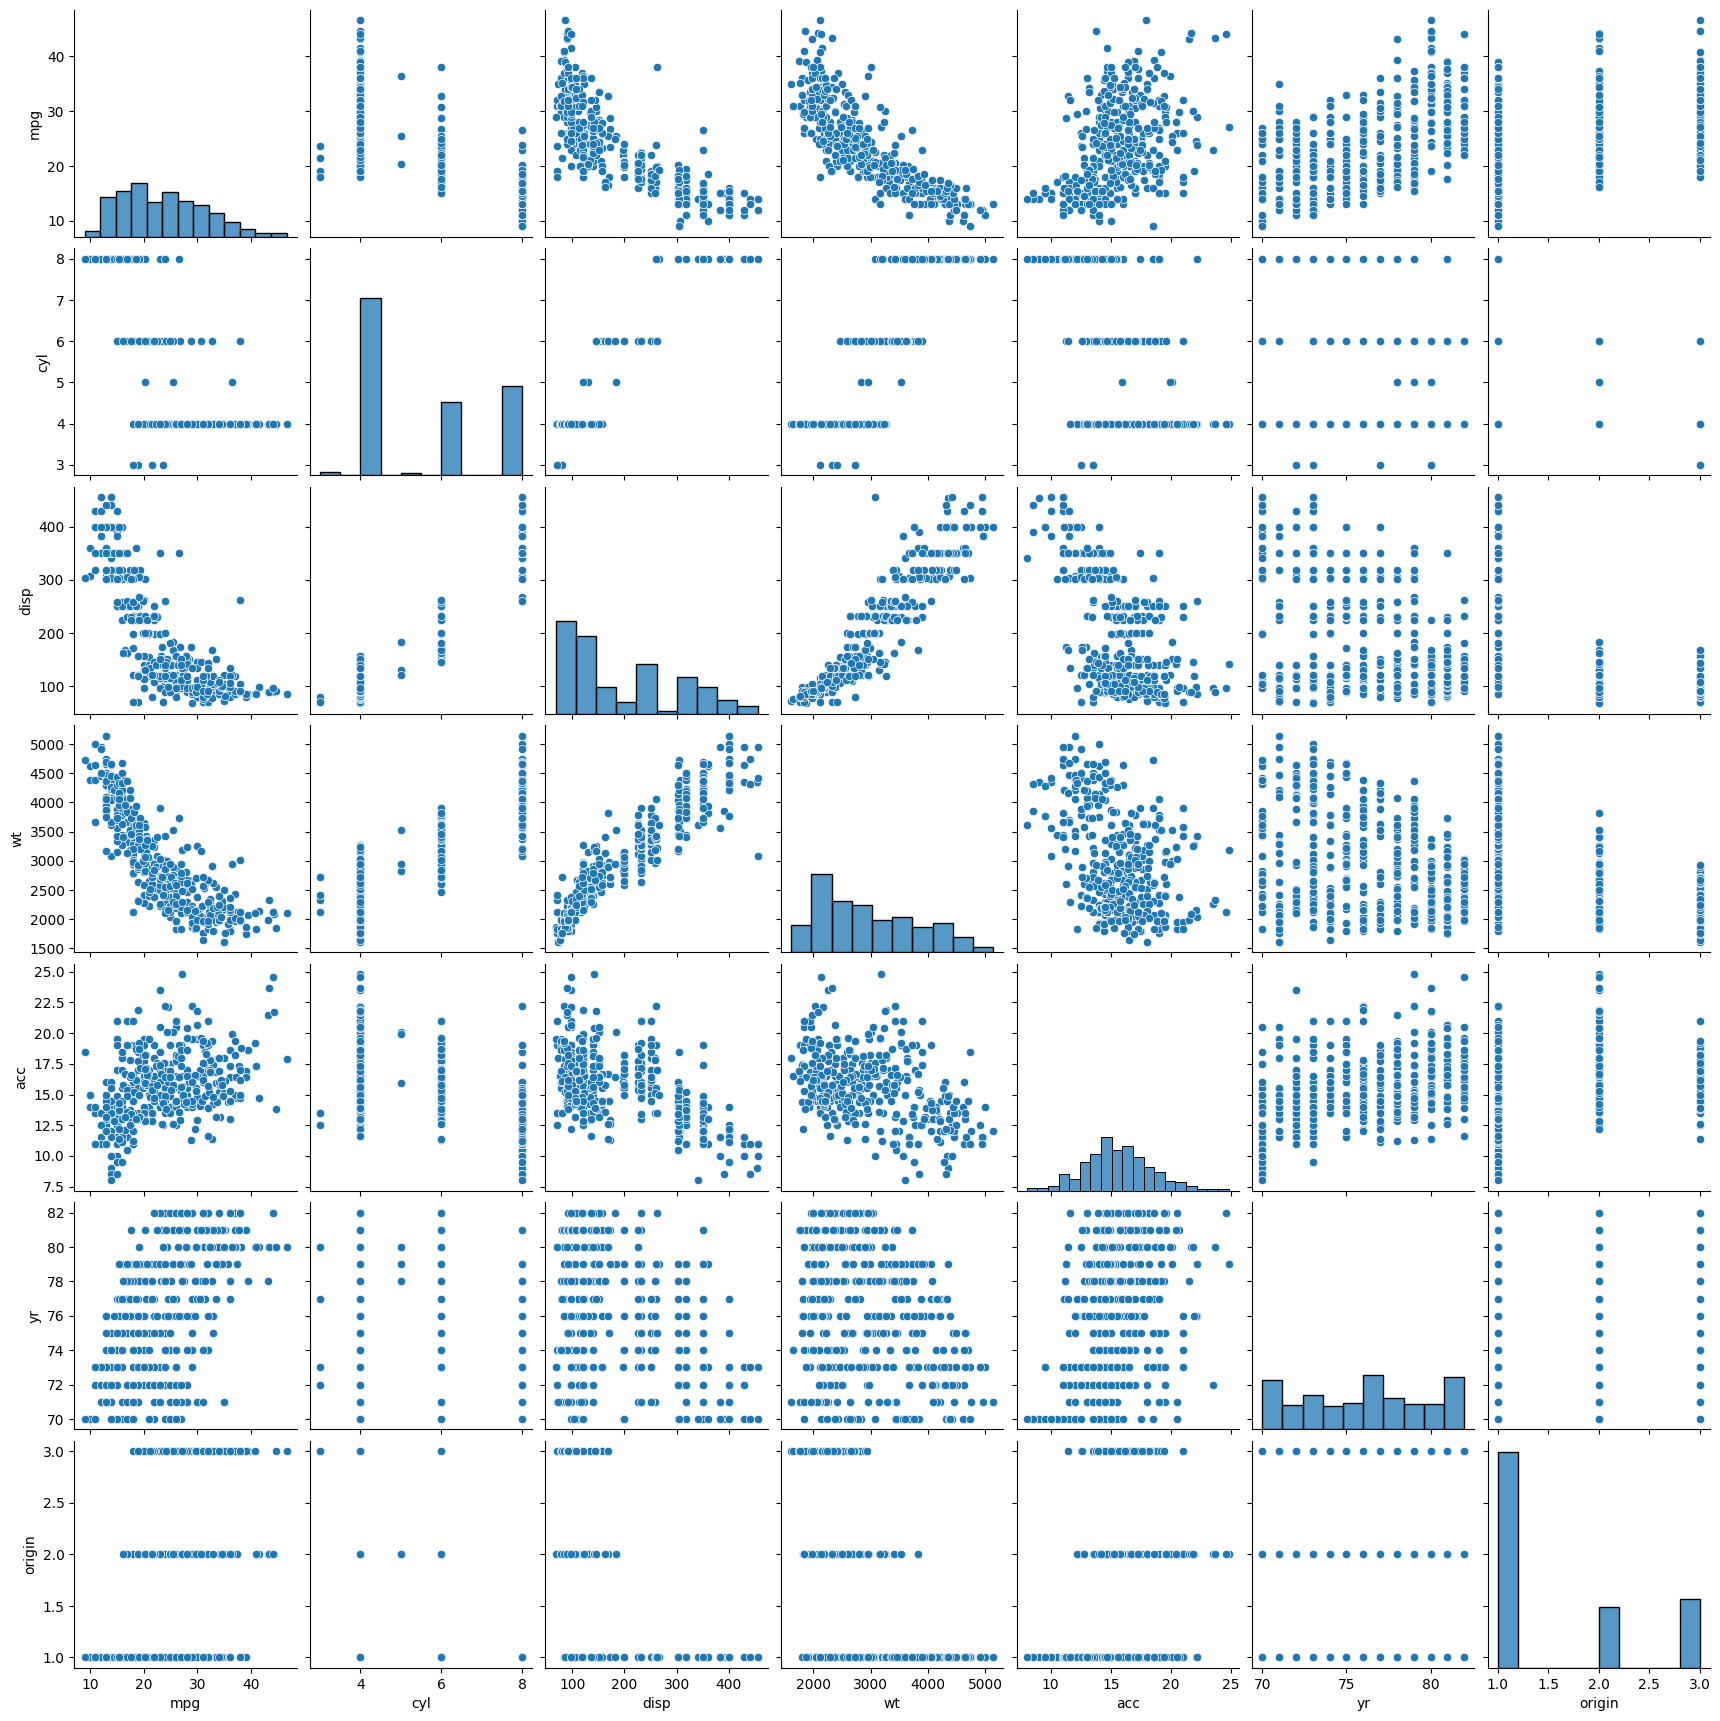

In [17]:
sns.pairplot(data=data_df,vars=['mpg','cyl','disp','wt','acc','yr','origin']);

In [18]:
data_df.corr()

<ipython-input-18-b47fa4ad56a1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_df.corr()


,mpg,cyl,disp,hp,wt,acc,yr,origin
mpg,1.000000,-0.775396,-0.804203,-0.773453,-0.831741,0.420289,0.579267,0.563450
cyl,-0.775396,1.000000,0.950721,0.841284,0.896017,-0.505419,-0.348746,-0.562543
disp,-0.804203,0.950721,1.000000,0.895778,0.932824,-0.543684,-0.370164,-0.609409
hp,-0.773453,0.841284,0.895778,1.000000,0.862442,-0.686590,-0.413733,-0.452096
wt,-0.831741,0.896017,0.932824,0.862442,1.000000,-0.417457,-0.306564,-0.581024
acc,0.420289,-0.505419,-0.543684,-0.686590,-0.417457,1.000000,0.288137,0.205873
yr,0.579267,-0.348746,-0.370164,-0.413733,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.452096,-0.581024,0.205873,0.180662,1.000000


Visualize a scatterplot for 'wt' and 'disp'. Datapoints are distinguished by 'cyl'.

<Axes: xlabel='wt', ylabel='disp'>

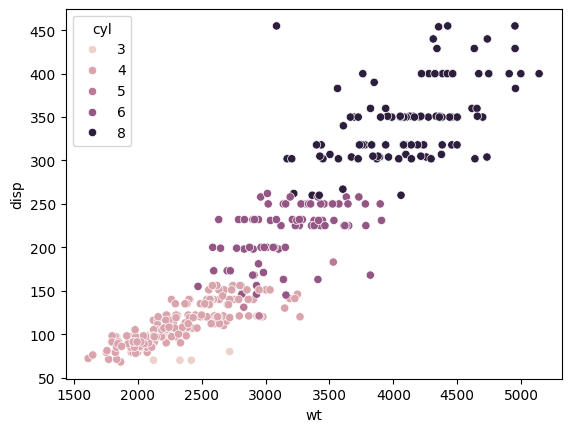

In [19]:
sns.scatterplot(data=data_df, x='wt', y='disp', hue='cyl')

wt and disp are highly correlated since with increasing wt, disp also increases. The correlation of the two variables is also 0.93.

Similarly with increasing cyl, both wt and disp increase showing high correlation. Correlation between wt and cyl is 0.89 while correlation between cyl and disp is 0.95

Visualize a scatterplot for 'wt'and 'mpg'. Datapoints are distinguished by 'cyl'.

<Axes: xlabel='wt', ylabel='mpg'>

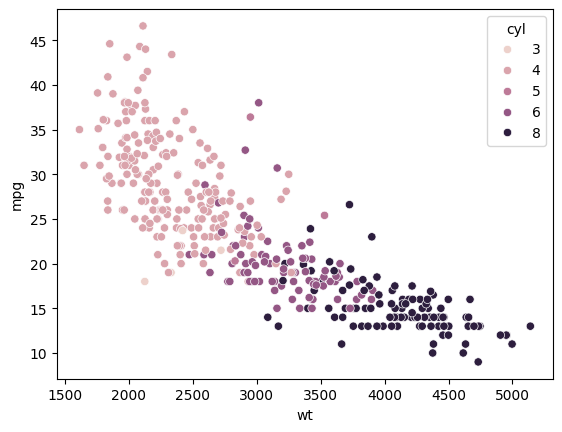

In [20]:
sns.scatterplot(data=data_df, x='wt', y='mpg', hue='cyl')

wt and mpg are highly negatively correlated since with increasing wt, mpg decreases. The correlation of the two variables is -0.85.

Similarly with increasing cyl, mpg decreases while wt increases. Correlation between wt and cyl is 0.89 while correlation between cyl and mpg is -0.77

Apply K-Means clustering

In [21]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(data_df.iloc[:,1:])
scaled_df

array([[-0.7064387 ,  1.49819126,  1.0906037 , ..., -1.29549834,
        -1.62742629, -0.71514478],
       [-1.09075062,  1.49819126,  1.5035143 , ..., -1.47703779,
        -1.62742629, -0.71514478],
       [-0.7064387 ,  1.49819126,  1.19623199, ..., -1.65857724,
        -1.62742629, -0.71514478],
       ...,
       [ 1.08701694, -0.85632057, -0.56103873, ..., -1.4407299 ,
         1.62198339, -0.71514478],
       [ 0.57460104, -0.85632057, -0.70507731, ...,  1.10082237,
         1.62198339, -0.71514478],
       [ 0.95891297, -0.85632057, -0.71467988, ...,  1.39128549,
         1.62198339, -0.71514478]])

Plot a visual and find elbow point

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

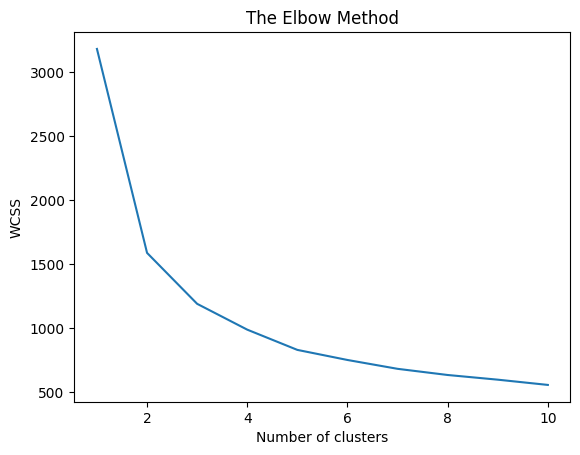

In [22]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

From the graph above, Elbow points for number of clusters are 3, 5, 7

Train a K-means clustering model on the optimal number of clusters.

In [23]:
kmeans_3cl = KMeans(n_clusters = 3, random_state = 42)
kmeans_3cl.fit(scaled_df)
print(kmeans_3cl.inertia_)
labels_3cl = kmeans_3cl.labels_
silhouette_score(scaled_df,labels_3cl)

1190.0436525504847


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.3246673901601845

In [24]:
kmeans_5cl = KMeans(n_clusters = 5, random_state = 42)
kmeans_5cl.fit(scaled_df)
print(kmeans_5cl.inertia_)
labels_5cl = kmeans_5cl.labels_
silhouette_score(scaled_df,labels_5cl)

829.7157874488787


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.33296973781495653

In [25]:
kmeans_7cl = KMeans(n_clusters = 7, random_state = 42)
kmeans_7cl.fit(scaled_df)
print(kmeans_7cl.inertia_)
labels_7cl = kmeans_7cl.labels_
silhouette_score(scaled_df,labels_7cl)

681.6526858914019


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.29218265608340643

K Means with 5 clusters gives the best silhoutte score.

Add a new feature in the DataFrame which will have labels based upon cluster value

In [26]:
data_df['Clus_kmeans5'] = labels_5cl
data_df.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin,Clus_kmeans5
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1,4
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1,4
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1,4
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1,4
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,1,4


In [27]:
data_df.Clus_kmeans5.value_counts().sort_index()

0    81
1    72
2    67
3    84
4    94
Name: Clus_kmeans5, dtype: int64

Pass a new DataPoint and predict which cluster it belongs to

In [28]:
scaled = scaler.transform([['18','6','305','150','3500','11','70','1']])
scaled

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.7064387 ,  0.32093534,  1.07139855,  1.19702651,  0.6261405 ,
        -1.65857724, -1.62742629, -0.71514478]])

In [29]:
pred = kmeans_5cl.predict(scaled)
pred[0]

4

The passed datapoint belongs to cluster 4

In [30]:
scaled = scaler.transform([['10','3','100','130','3500','12','70','1']])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [31]:
pred = kmeans_5cl.predict(scaled)
pred[0]

3

The passed datapoint belongs to cluster 3

Plot a visual and color the datapoints based upon clusters

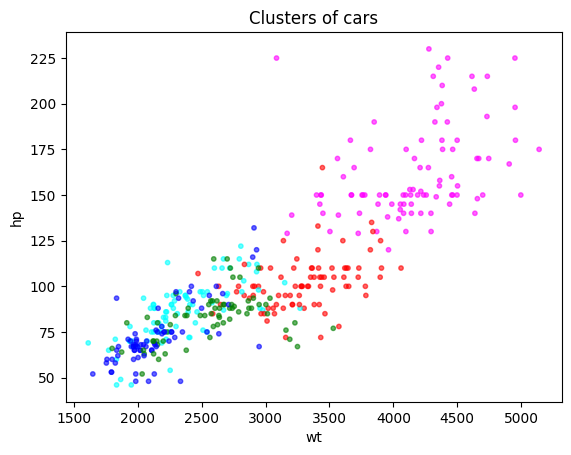

In [32]:
colors = ['red', 'blue', 'green', 'cyan', 'magenta']
df=pd.DataFrame()
df['c'] = data_df.Clus_kmeans5.map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4]})
plt.scatter(data_df.wt, data_df.hp, c=df.c, alpha = 0.6, s=10)
#plt.scatter(kmeans_5cl.cluster_centers_[:, 0], kmeans_5cl.cluster_centers_[:, 1], s = 50, c = 'yellow', marker='+')
plt.title('Clusters of cars')
plt.xlabel('wt')
plt.ylabel('hp')
plt.show()